In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score



##**1. Loading and Preprocessing**

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()

In [4]:
X = iris.data  # Feature matrix (Droped the species column since this is a clustering problem.)

In [5]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Convert to DataFrame
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#**2. Clustering Algorithm Implementation**

# A) KMeans Clustering


In [11]:
# Elbow Method to Determine Optimal K
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)
for i in K_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


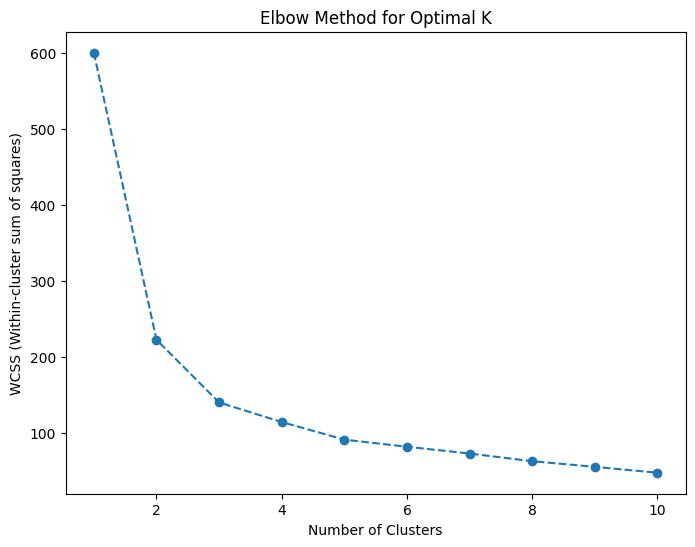

In [12]:
# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.show()

In [13]:
# applying kmeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

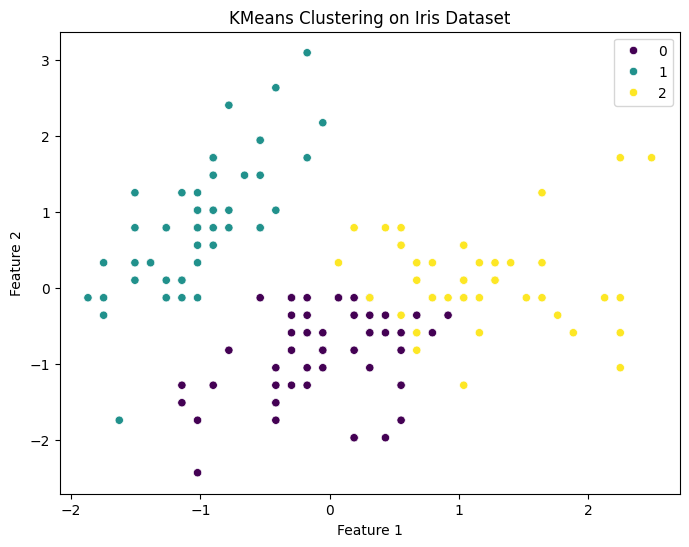

In [14]:
# Visualizing KMeans Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## KMeans clustering is suitable for the Iris dataset because it naturally forms three distinct clusters that align well with the three species present in the data. The algorithm efficiently partitions the dataset based on feature similarities, making it effective for well-separated, spherical clusters like those found in Iris. Additionally, KMeans is computationally efficient and works well with standardized numerical features.

## B) Hierarchical Clustering

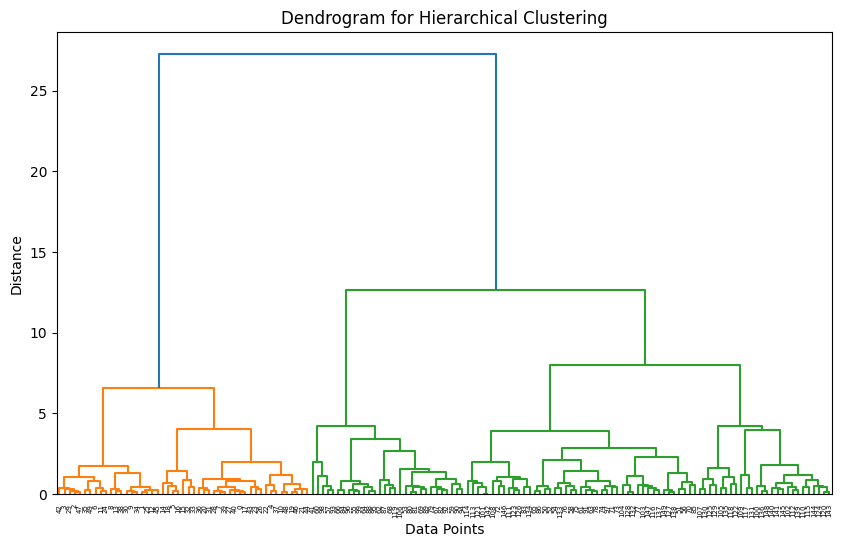

In [15]:
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [17]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X_scaled)

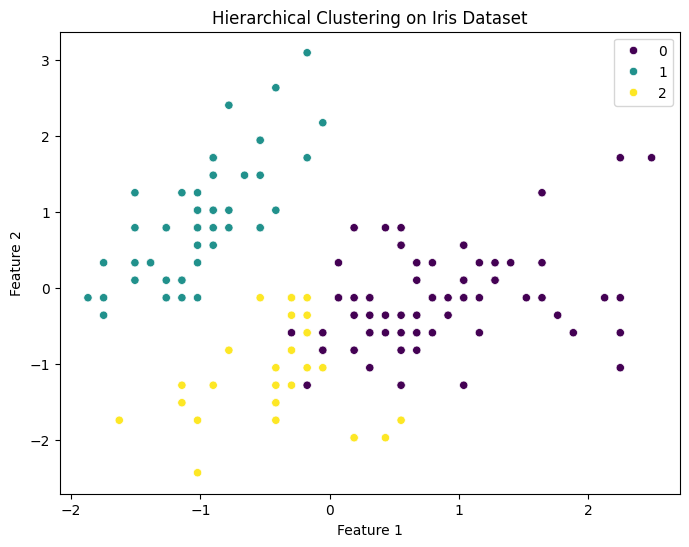

In [18]:
# Visualizing Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_hc, palette='viridis')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

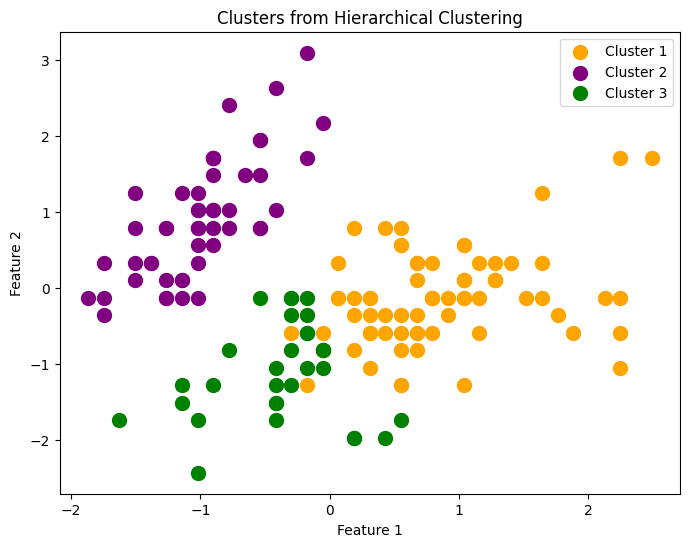

In [25]:
# Plotting individual clusters
plt.figure(figsize=(8, 6))

# Plotting data points from Cluster 1
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 1], s=100, c='orange', label='Cluster 1')
# X[y_hc == 0, 0] represents the x-coordinates of the data points in cluster 0
# X[y_hc == 0, 1] represents the y-coordinates of the data points in cluster 0

# Plotting data points from Cluster 2
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 1], s=100, c='purple', label='Cluster 2')

# Plotting data points from Cluster 3
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters from Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [21]:
# cluster labels
print("Hierarchical Clustering Labels:")
print(y_hc)


Hierarchical Clustering Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


## Hierarchical clustering is suitable for the Iris dataset because it provides a clear hierarchical structure, allowing us to visualize how clusters are formed at different levels using a dendrogram. It does not require specifying the number of clusters in advance, making it useful for exploring natural groupings in the data. Additionally, it works well with small to moderately sized datasets like Iris, where relationships between points can be effectively captured.

In [23]:
# silhouette score
hierarchical_silhouette = float(silhouette_score(X_scaled, y_hc))
hierarchical_silhouette

0.4466890410285909